#Importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, r2_score, roc_curve, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import xgboost as xgb


#Loading dataset

In [ ]:
df=pd.read_csv('/content/customer_behavior_train.csv')
df_test = pd.read_csv('/content/customer_behavior_test.csv')

In [ ]:
df.sample(5)

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Referral,Browser_Refresh_Rate,Last_Ad_Seen,Purchase
502,4.34,8.89,1,51.89,Instagram,89.56,A,0
740,4.29,13.81,0,62.24,Google,148.33,B,0
519,5.61,7.42,0,194.19,Google,57.16,C,0
720,7.19,16.90,0,31.93,Facebook,175.20,A,1
459,7.66,23.06,0,129.30,Instagram,116.69,A,1


#EDA

In [ ]:
#checking if any value is missing
df.isnull().sum()

,0
Time_on_site,0
Pages_viewed,0
Clicked_ad,0
Cart_value,0
Referral,0
Browser_Refresh_Rate,0
Last_Ad_Seen,0
Purchase,0


In [ ]:
#checking if any row is duplicated
df.duplicated().sum()

np.int64(0)

In [ ]:
#Names of columns
df.columns

Index(['Time_on_site', 'Pages_viewed', 'Clicked_ad', 'Cart_value', 'Referral',
       'Browser_Refresh_Rate', 'Last_Ad_Seen', 'Purchase'],
      dtype='object')

In [ ]:
#information of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_on_site          1800 non-null   float64
 1   Pages_viewed          1800 non-null   float64
 2   Clicked_ad            1800 non-null   int64  
 3   Cart_value            1800 non-null   float64
 4   Referral              1800 non-null   object 
 5   Browser_Refresh_Rate  1800 non-null   float64
 6   Last_Ad_Seen          1800 non-null   object 
 7   Purchase              1800 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 112.6+ KB


In [ ]:
#count of class 0 and 1 of purchase column
df['Purchase'].value_counts()

,count
Purchase,
0,1274
1,526


In [ ]:
#shows statistics of each feature
df.describe()

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Browser_Refresh_Rate,Purchase
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,4.962244,12.429483,0.301111,50.352933,100.662100,0.292222
std,2.336373,6.381941,0.458868,47.443390,51.645694,0.454910
min,0.500000,0.760000,0.000000,10.000000,-65.800000,0.000000
25%,3.300000,7.860000,0.000000,13.862500,65.430000,0.000000
50%,4.935000,12.020000,0.000000,34.690000,99.735000,0.000000
75%,6.610000,16.500000,1.000000,67.630000,134.755000,1.000000
max,10.000000,35.340000,1.000000,300.000000,303.400000,1.000000


In [ ]:
#unique values of last ad seen feature
df['Last_Ad_Seen'].unique()

array(['D', 'A', 'C', 'B'], dtype=object)

In [ ]:
#unique values of referral feature
df['Referral'].unique()

array(['Facebook', 'Instagram', 'Google', 'Direct'], dtype=object)

##Plots

<Axes: xlabel='Time_on_site', ylabel='Pages_viewed'>

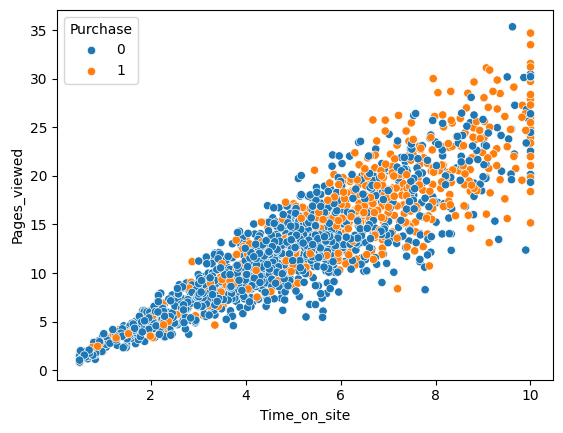

In [ ]:
#scatter plot between time on site and pages viewed
sns.scatterplot(x=df['Time_on_site'],y=df['Pages_viewed'],hue=df['Purchase'])

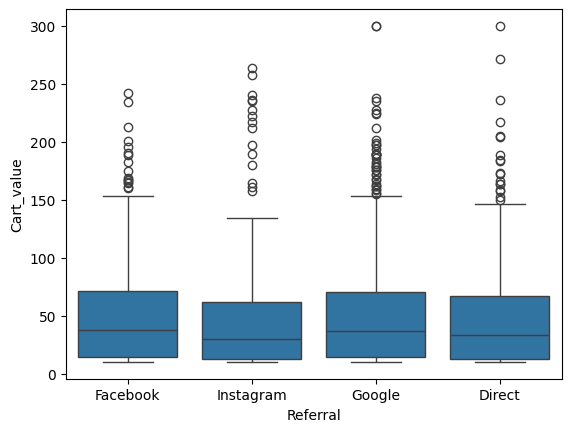

In [ ]:
#Box plot between referral and cart value
sns.boxplot(x='Referral',y='Cart_value',data = df)
plt.xlabel('Referral')
plt.ylabel('Cart_value')
plt.show()

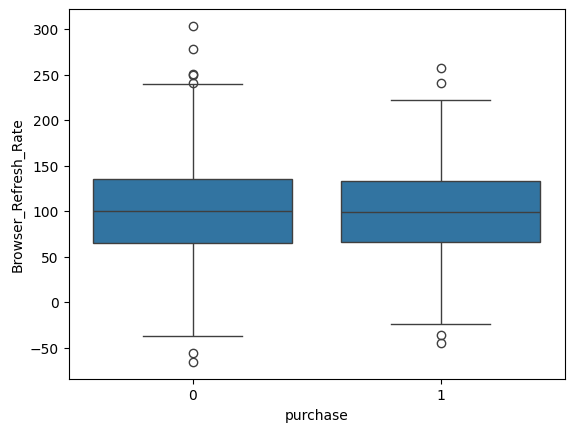

In [ ]:
#Box plot between purchase and browser refresh rate
sns.boxplot(x='Purchase',y='Browser_Refresh_Rate', data=df)
plt.xlabel('purchase')
plt.ylabel('Browser_Refresh_Rate')
plt.show()

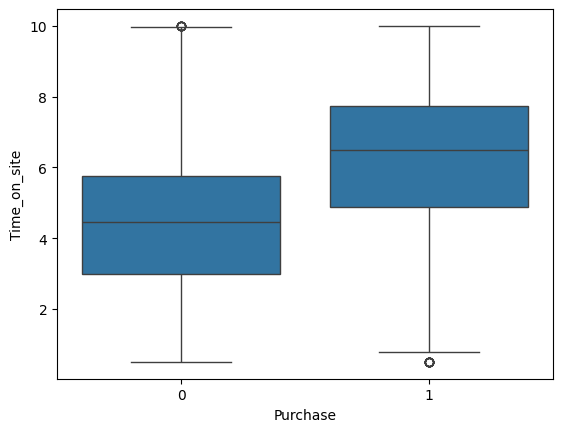

In [ ]:
#Box plot between purchase and time on site
sns.boxplot(x='Purchase',y='Time_on_site',data = df)
plt.xlabel('Purchase')
plt.ylabel('Time_on_site')
plt.show()

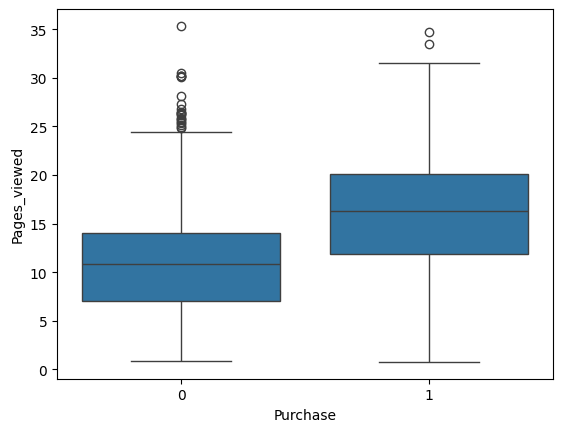

In [ ]:
#Box plot between purchase and pages viewed
sns.boxplot(x='Purchase',y='Pages_viewed',data = df)
plt.xlabel('Purchase')
plt.ylabel('Pages_viewed')
plt.show()

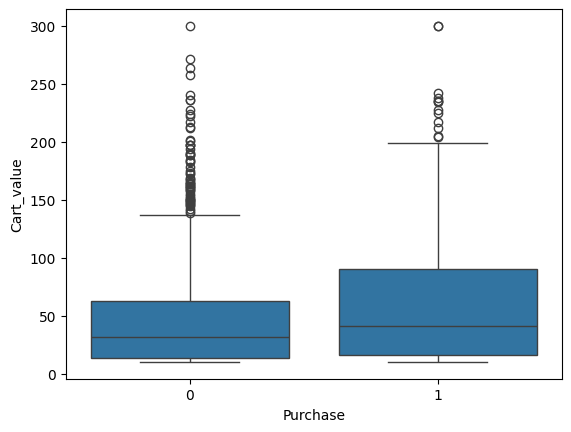

In [ ]:
#Box plot between purchase and cart value
sns.boxplot(x='Purchase',y='Cart_value',data = df)
plt.xlabel('Purchase')
plt.ylabel('Cart_value')
plt.show()

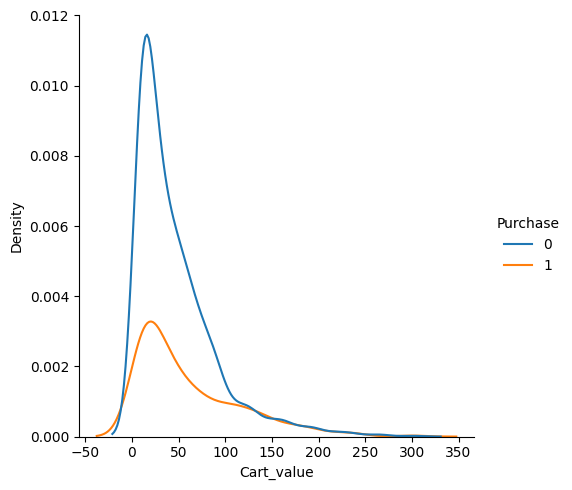

In [ ]:
#Kernel Density plot of Cart value
sns.displot(data = df, x='Cart_value',hue='Purchase',kind='kde')

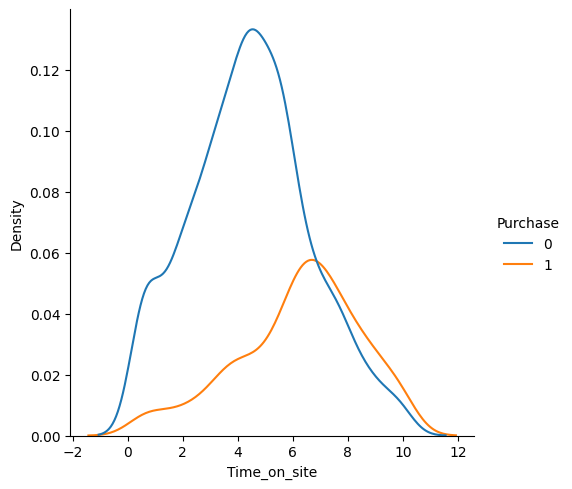

In [ ]:
#Kernel density plot of Time on site
sns.displot(data=df,x='Time_on_site',hue='Purchase',kind='kde')

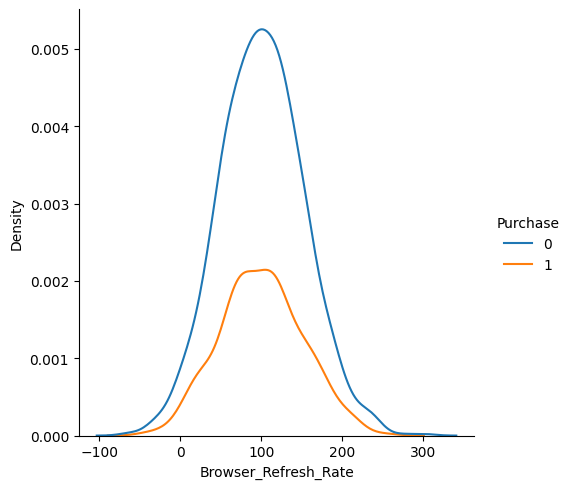

In [ ]:
#Kernel density plot of browser refresh rate
sns.displot(data=df,x='Browser_Refresh_Rate',hue='Purchase',kind='kde')

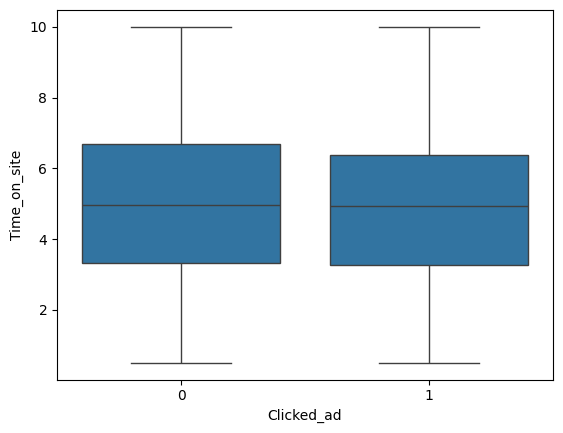

In [ ]:
#Box plot between clicked ad and time on site
sns.boxplot(x='Clicked_ad',y='Time_on_site',data = df)
plt.xlabel('Clicked_ad')
plt.ylabel('Time_on_site')
plt.show()

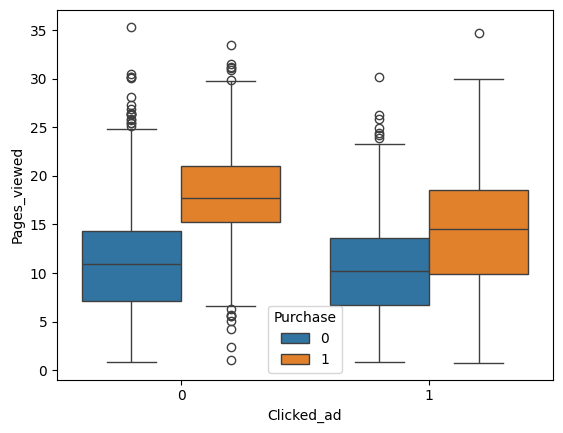

In [ ]:
#Box plot between clicked ad and pages viewed
sns.boxplot(x='Clicked_ad',y='Pages_viewed',data = df,hue='Purchase')
plt.xlabel('Clicked_ad')
plt.ylabel('Pages_viewed')
plt.show()

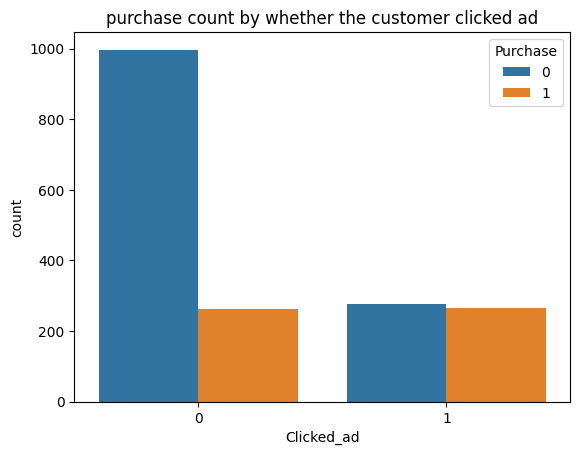

In [ ]:
#countplot
sns.countplot(x='Clicked_ad',hue='Purchase',data=df)
plt.title('purchase count by whether the customer clicked ad')
plt.show()

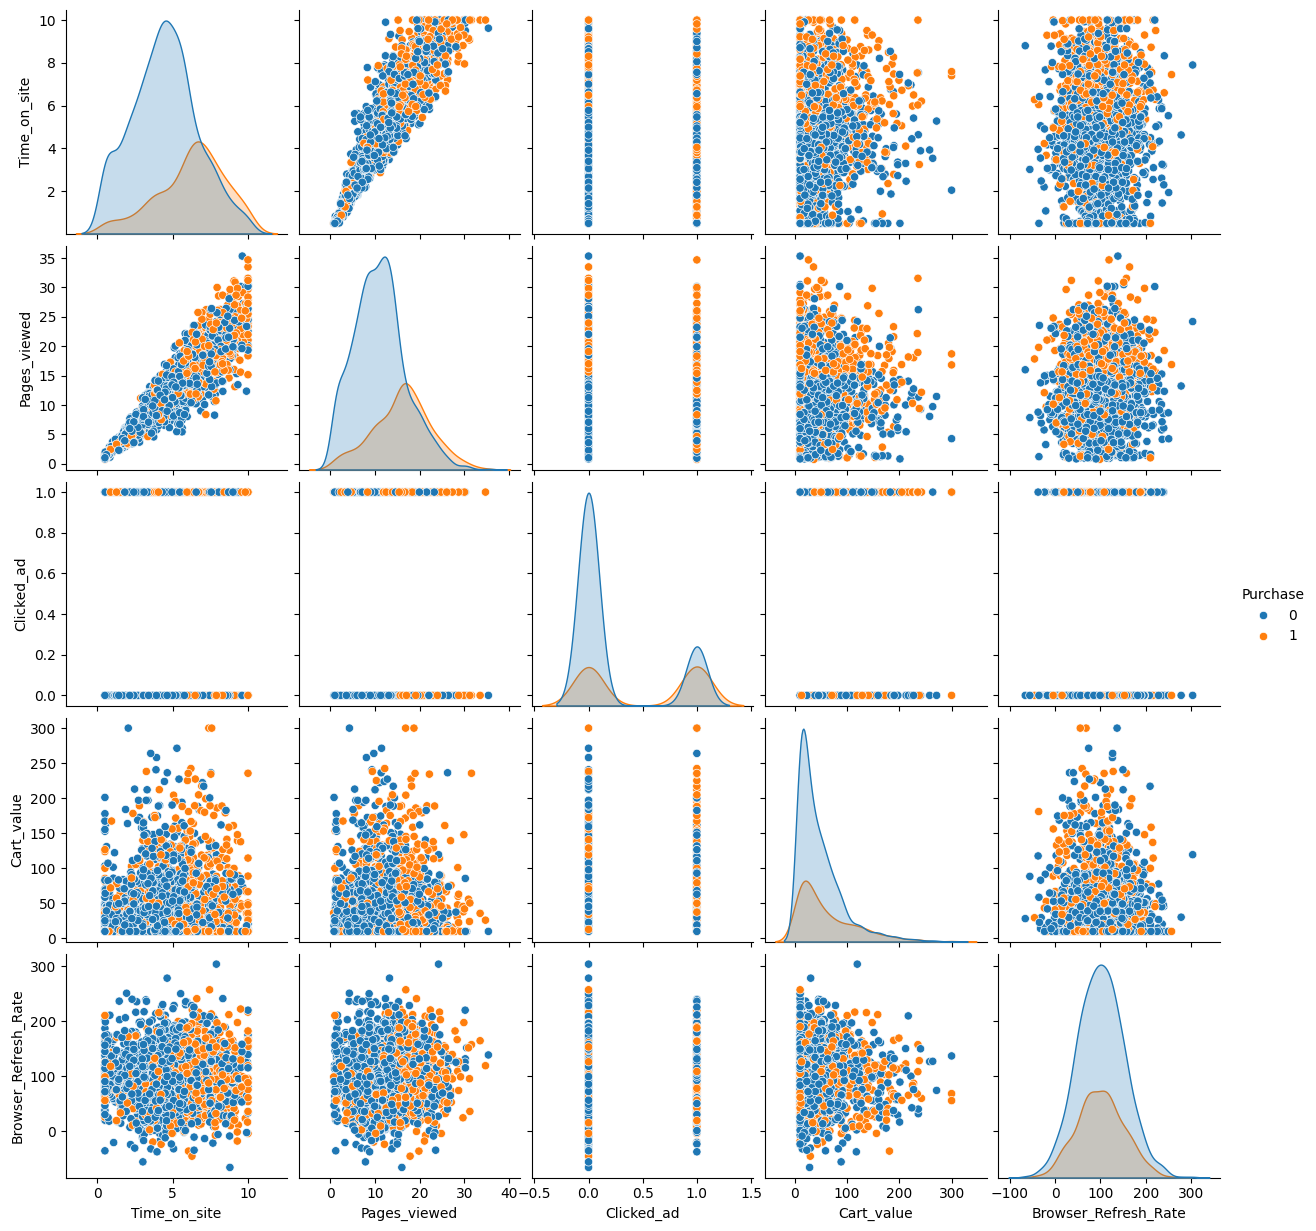

In [ ]:
#plot between various features
sns.pairplot(df,hue='Purchase')

<Axes: ylabel='proportion'>

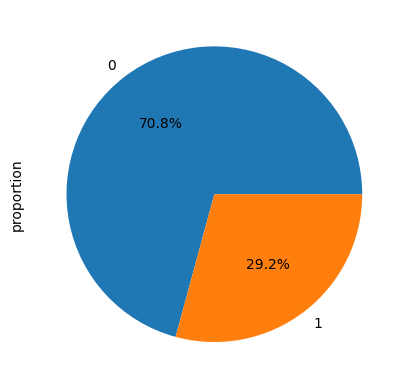

In [ ]:
#pie chart showing % of class 0 and 1 Purchase column
df['Purchase'].value_counts(normalize= True).plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='count', ylabel='Purchase'>

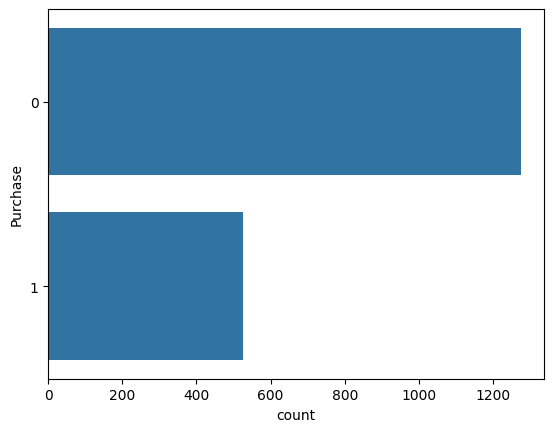

In [ ]:
#countplot of Purchase column
sns.countplot(y=df['Purchase'])

###Referral

<Axes: ylabel='count'>

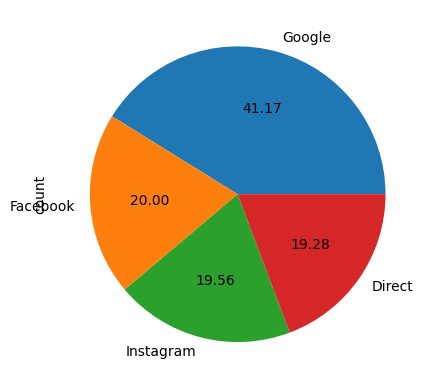

In [ ]:
#pie chart showing % of different Referral categories
df['Referral'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
#count of each referral category
refers = df.groupby('Referral')
refers.size()

,0
Referral,
Direct,347
Facebook,360
Google,741
Instagram,352


In [ ]:
#count of each referral category among those who purchased
mask1 = df['Purchase'] == 1

#dataframe contaning rows which have purchase = 1
df_yes = df[mask1]

refers_yes = df_yes.groupby('Referral')
refers_yes.size()

,0
Referral,
Direct,107
Facebook,111
Google,205
Instagram,103


In [ ]:
#dataframe having referral count , referral count for purchase = 1, percentage of people from each category who purchased
df_refers = pd.DataFrame()

In [ ]:
df_refers['Referral_count'] = refers.size()
df_refers['Referral_count_for_purchase_true'] = refers_yes.size()
df_refers['Percentage_who_purchased'] = np.round((df_refers['Referral_count_for_purchase_true']/df_refers['Referral_count']) * 100 , 2)

In [ ]:
df_refers

,Referral_count,Referral_count_for_purchase_true,Percentage_who_purchased
Referral,,,
Direct,347,107,30.84
Facebook,360,111,30.83
Google,741,205,27.67
Instagram,352,103,29.26


<Axes: ylabel='Percentage_who_purchased'>

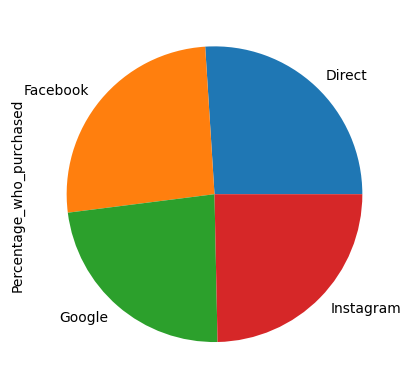

In [ ]:
#piechart showing percentage of people from each category who purchased
df_refers['Percentage_who_purchased'].plot(kind='pie')

###Last_Ad_Seen

<Axes: ylabel='count'>

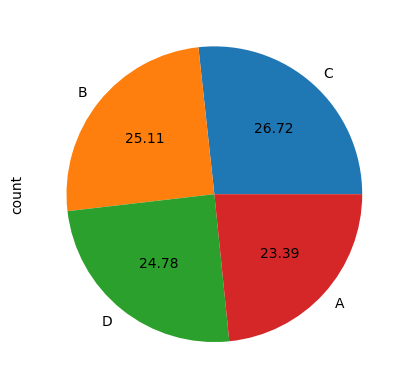

In [ ]:
#pie chart showing % of different last ad seen categories
df['Last_Ad_Seen'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
#count of each last ad seen category
last_ads = df.groupby('Last_Ad_Seen')
last_ads.size()

,0
Last_Ad_Seen,
A,421
B,452
C,481
D,446


In [ ]:
#count of each last ad seen category among those who purchased
mask1 = df['Purchase'] == 1

#dataframe contaning rows which have purchase = 1
df_yes = df[mask1]

last_ads_yes = df_yes.groupby('Last_Ad_Seen')
last_ads_yes.size()

,0
Last_Ad_Seen,
A,120
B,138
C,131
D,137


In [ ]:
#dataframe having last ad seen count , last ad seen count for purchase = 1, percentage of people from each category who purchased
df_last_ads = pd.DataFrame()

In [ ]:
df_last_ads['Last_ads_count'] = last_ads.size()
df_last_ads['Last_ads_count_for_purchase_true'] = last_ads_yes.size()
df_last_ads['Percentage_who_purchased'] = np.round((df_last_ads['Last_ads_count_for_purchase_true']/df_last_ads['Last_ads_count']) * 100 , 2)

In [ ]:
df_last_ads

,Last_ads_count,Last_ads_count_for_purchase_true,Percentage_who_purchased
Last_Ad_Seen,,,
A,421,120,28.50
B,452,138,30.53
C,481,131,27.23
D,446,137,30.72


<Axes: ylabel='Percentage_who_purchased'>

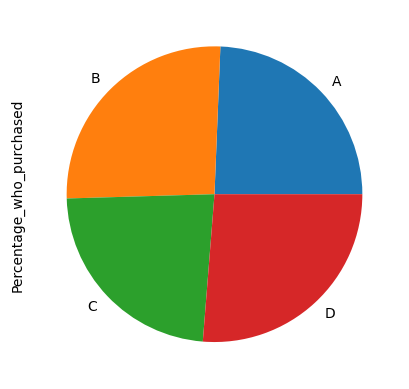

In [ ]:
#piechart showing percentage of people from each category who purchased
df_last_ads['Percentage_who_purchased'].plot(kind='pie')

#Separating the input and target columns


In [ ]:
X_train = df.iloc[:,0:7]
y_train = df.iloc[:,-1]

In [ ]:
X_test = df_test.iloc[:,0:7]
y_test = df_test.iloc[:,-1]

#Column transformations

##Applying one hot encoding

In [ ]:
#Applying one hot encoding on both the categorical input columns
ohe = OneHotEncoder( sparse_output=False)
X_train_Ref_Last_Ad_arr = ohe.fit_transform(X_train[['Referral','Last_Ad_Seen']])
X_test_Ref_Last_Ad_arr = ohe.fit_transform(X_test[['Referral','Last_Ad_Seen']])

In [ ]:
#array of column names of the new encoded columns
cols_arr = np.concatenate((ohe.categories_[0],ohe.categories_[1]),axis = 0)
cols_arr

array(['Direct', 'Facebook', 'Google', 'Instagram', 'A', 'B', 'C', 'D'],
      dtype=object)

In [ ]:
#dataframe having the new one hot encoded columns
X_train_Ref_Last_Ad = pd.DataFrame(X_train_Ref_Last_Ad_arr,columns =cols_arr )
X_test_Ref_Last_Ad = pd.DataFrame(X_test_Ref_Last_Ad_arr,columns =cols_arr )
X_test_Ref_Last_Ad

,Direct,Facebook,Google,Instagram,A,B,C,D
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
445,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
446,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
447,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
448,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
#adding the one hot encoded columns to actual dataset

X_train_others = X_train.drop(columns=['Referral','Last_Ad_Seen'])
X_test_others = X_test.drop(columns=['Referral','Last_Ad_Seen'])
X_train_transformed = pd.concat([X_train_others, X_train_Ref_Last_Ad],axis=1)
X_test_transformed = pd.concat([X_test_others, X_test_Ref_Last_Ad],axis=1)

X_train_transformed.sample(5)

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Browser_Refresh_Rate,Direct,Facebook,Google,Instagram,A,B,C,D
618,3.49,7.96,0,56.33,68.14,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
772,5.13,15.82,0,21.72,6.32,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
868,7.83,11.86,0,57.46,31.27,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
547,1.03,2.58,0,53.26,81.34,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1552,5.45,20.58,1,26.31,140.52,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#dropping the browser refersh rate columnn due to irrelevance
X_train_transformed_drop_browser_rate = X_train_transformed.drop(columns=['Browser_Refresh_Rate'])
X_test_transformed_drop_browser_rate = X_test_transformed.drop(columns=['Browser_Refresh_Rate'])

In [ ]:
#shape of training input set
X_train_transformed_drop_browser_rate.shape

(1800, 12)

#Xg boost

##Training and evaluating our model

In [ ]:
#XGBoost model
xgbc = xgb.XGBClassifier(eval_metric='logloss',random_state=42,learning_rate=0.02)

In [ ]:
#Training our model
xgbc.fit(X_train_transformed_drop_browser_rate,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
#Making predictions
y_pred_xgbc = xgbc.predict(X_test_transformed_drop_browser_rate)

In [ ]:
print('accuracy score ',accuracy_score(y_test,y_pred_xgbc))
print('cross_val_score ',cross_val_score(xgbc,X_test_transformed_drop_browser_rate,y_test,cv=10).mean())

accuracy score  0.7866666666666666
cross_val_score  0.7355555555555556


##Hyper parameter tuning using Grid search cv for XG Boost

In [ ]:
grid = dict()

grid['n_estimators'] = [10,20, 50, 100]
grid['learning_rate'] = [0.001, 0.01, 0.1, 1.0]
grid['max_depth'] = [3,5,7]
grid['subsample'] = [0.8,1]
grid['colsample_bytree'] = [0.8,1]
grid['scale_pos_weight'] = [1,2.33]

#Grid search
grid_search = GridSearchCV(estimator=xgbc, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')

grid_result = grid_search.fit(X_train_transformed_drop_browser_rate, y_train)


#Print best score and best hyper parameters

print("best score ",grid_result.best_score_)
print('best params ', grid_result.best_params_)

best score  0.7705555555555555
best params  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20, 'scale_pos_weight': 1, 'subsample': 0.8}


In [ ]:
#Use the best model found by GridSearchCV to make predictions on the test set
y_pred_xgbc_grid = grid_search.best_estimator_.predict(X_test_transformed_drop_browser_rate)

In [ ]:
print('accuracy score ',accuracy_score(y_test,y_pred_xgbc_grid))

accuracy score  0.7911111111111111


##Other metrics for XG Boost

###Precision, Recall and f1 score

In [ ]:
print('precision score ',precision_score(y_test,y_pred_xgbc_grid))
print('recall score ',recall_score(y_test,y_pred_xgbc_grid))
print('f1 score ',f1_score(y_test,y_pred_xgbc_grid))

precision score  0.71875
recall score  0.5073529411764706
f1 score  0.5948275862068966


###Confusion matrix

In [ ]:
cdf_xgb = pd.DataFrame(confusion_matrix(y_test,y_pred_xgbc_grid),columns=list(range(0,2)))
print(cdf_xgb)

     0   1
0  287  27
1   67  69


###AUC score

In [ ]:
y_score_xgb = xgbc.predict_proba(X_test_transformed_drop_browser_rate)

In [ ]:
roc_auc_score(y_test,y_score_xgb[:,1])

np.float64(0.8386919258149119)

###Plotting roc auc curve

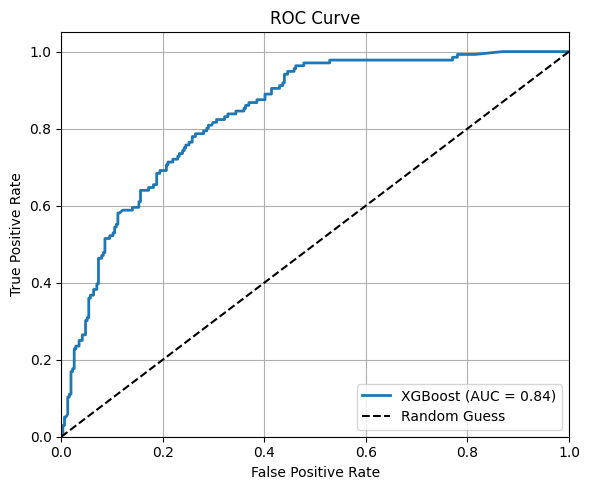

In [ ]:
def plot_roc_curve(y_true, y_proba, model_name='Model'):

    fpr = roc_curve(y_test,y_proba)[0] #false positive rate is the first array of roc_curve output
    tpr = roc_curve(y_test,y_proba)[1] #true positive rate is the second array of roc_curve output
    auc = roc_auc_score(y_true, y_proba) #roc_auc_score is calculated

    plt.figure(figsize=(6, 5)) #size of the graph

    #x axis is false positive rate
    #y axis is true positive rate
    #line width = 2
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})',lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


    #Random guess line from (0,0) to (1,1)
    plt.plot([0, 1], [0, 1], '--', color='black',label='Random Guess')

    #range of values on x and y axis
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.grid(True)
    plt.tight_layout()

    #label (in the lower right) is the model name and roc_auc_score and random guess
    plt.legend(loc='lower right')

    plt.show()


#ploting the roc curve
y_pred_proba = xgbc.predict_proba(X_test_transformed_drop_browser_rate)[:, 1]  #Class 1 probability
plot_roc_curve(y_test, y_pred_proba, model_name='XGBoost') #Function call

##XGBoost from **scratch**

In [ ]:
class XGBoost_from_scratch:

  def __init__(self,n_estimators = 50, learning_rate = 0.1,max_depth=1):

    #initializing the hyperparameters
    self.n_estimators = n_estimators
    self.learning_rate = learning_rate
    self.max_depth = max_depth

    self.models = []

  #fit function
  def fit(self,X_train,y_train):

    y_train = np.array(y_train)

    #probability of positive class
    p = np.mean(y_train)

    #log(odds)
    log_odds = np.log( ( p + 0.0000000001 ) / ( (1-p) + 0.000000001 ) )
    self.log_odds = log_odds

    #(1st predictor)
    #initial prediction is log(odds)
    y_pred = np.full(X_train.shape[0],log_odds)

    #probability
    y_pred_prob = (np.exp(y_pred)) / (1 + (np.exp(y_pred)))

    #residual
    y_res = y_train - y_pred_prob

    for i in range(self.n_estimators):
      #2nd predictor
      dt = DecisionTreeRegressor(max_depth = self.max_depth)
      dt.fit(X_train,y_res)

      #prediction
      y_pred = y_pred + (self.learning_rate * dt.predict(X_train))

      #probablity
      y_pred_prob = (np.exp(y_pred)) / (1 + (np.exp(y_pred)))

      #residual
      y_res = y_train - y_pred_prob

      #storing all the base models
      self.models.append(dt)

  #predict function
  def predict(self,X_test):
    y_pred = np.full(X_test.shape[0],self.log_odds)

    #adding predictions of every base model
    for model in self.models:

      y_pred = y_pred + (self.learning_rate * model.predict(X_test))

    #converting the prediction to probability
    y_pred_prob = (np.exp(y_pred)) / (1 + (np.exp(y_pred)))

    #if probability > 53% then purchase = 1 owing to imbalanced nature of dataset
    for num in range(y_pred_prob.shape[0]):

      if y_pred_prob[num] > 0.53 :
        y_pred_prob[num] = 1

      else:
        y_pred_prob[num] = 0

    #returning the predicited target column values
    return y_pred_prob


In [ ]:
#training and evaluating our own XGBoost model
xgbc_scratch = XGBoost_from_scratch(n_estimators = 20, learning_rate = 0.3, max_depth = 2)
xgbc_scratch.fit(X_train_transformed_drop_browser_rate,y_train)
y_pred_xgbc_scratch = xgbc_scratch.predict(X_test_transformed_drop_browser_rate)

In [ ]:
accuracy_score(y_test,y_pred_xgbc_scratch)

0.7866666666666666

This is a very **simplified XGBoost model** without regularization.
It is giving an **accuracy of 78.67%**



#Ada boost

##Training and evaluating our model

In [ ]:
#Adaboost model
abc = AdaBoostClassifier(learning_rate=0.5,n_estimators=10)

In [ ]:
#Training the model
abc.fit(X_train_transformed_drop_browser_rate,y_train)


AdaBoostClassifier(learning_rate=0.5, n_estimators=10)

In [ ]:
#Making predictions
y_pred_abc = abc.predict(X_test_transformed_drop_browser_rate)
print('accuracy score ',accuracy_score(y_test,y_pred_abc))
print('cross_val_score ',cross_val_score(abc,X_test_transformed_drop_browser_rate,y_test,cv=10).mean())

accuracy score  0.7955555555555556
cross_val_score  0.7822222222222223


##Hyper parameter tuning using Grid search cv for Adaboost

In [ ]:
grid = dict()
grid['n_estimators'] = [10,50]
grid['learning_rate'] = [0.5,1]

#Grid search
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')

grid_result = grid_search.fit(X_train_transformed_drop_browser_rate, y_train)

#Print best score and best hyper parameters
print("best score ",grid_result.best_score_)
print('best params ', grid_result.best_params_)

best score  0.7694444444444444
best params  {'learning_rate': 0.5, 'n_estimators': 10}


In [ ]:
#Use the best model found by GridSearchCV to make predictions on the test set
y_pred_abc_grid = grid_search.best_estimator_.predict(X_test_transformed_drop_browser_rate)
print('accuracy score ',accuracy_score(y_test,y_pred_abc_grid))

accuracy score  0.7955555555555556


##Feature importance using Adaboost

In [ ]:
#Check feature importance based on how much they contribute to the model's prediction
abc.feature_importances_

array([0.21239575, 0.27058832, 0.30347102, 0.21354491, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [ ]:
df_feature_imp_abc = pd.DataFrame({
    'Feature' : X_train_transformed_drop_browser_rate.columns,
    'Importance' : abc.feature_importances_
})
df_feature_imp_abc

,Feature,Importance
0,Time_on_site,0.212396
1,Pages_viewed,0.270588
2,Clicked_ad,0.303471
3,Cart_value,0.213545
4,Direct,0.000000
5,Facebook,0.000000
6,Google,0.000000
7,Instagram,0.000000
8,A,0.000000
9,B,0.000000


<Axes: >

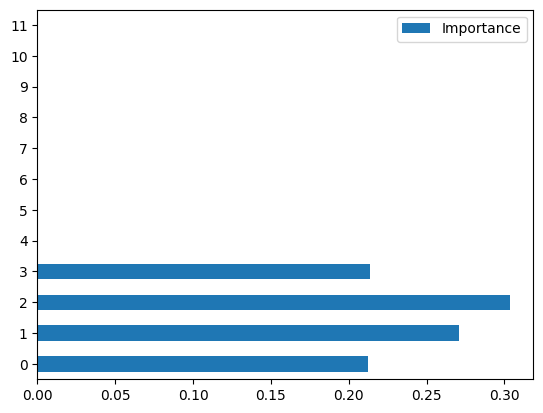

In [ ]:
#Visualize the feature importance
df_feature_imp_abc.plot(kind='barh')

##Other metrics for Ada boost

###Precision, Recall and f1 score

In [ ]:
print('precision score ',precision_score(y_test,y_pred_abc_grid))
print('recall score ',recall_score(y_test,y_pred_abc_grid))
print('f1 score ',f1_score(y_test,y_pred_abc_grid))

precision score  0.7156862745098039
recall score  0.5367647058823529
f1 score  0.6134453781512605


###Confusion matrix

In [ ]:
cdf_abc = pd.DataFrame(confusion_matrix(y_test,y_pred_abc_grid),columns=list(range(0,2)))
print(cdf_abc)

     0   1
0  285  29
1   63  73


###AUC score

In [ ]:
y_score_abc = abc.predict_proba(X_test_transformed_drop_browser_rate)

In [ ]:
roc_auc_score(y_test,y_score_abc[:,1])

np.float64(0.8616405957287374)

###Plotting roc auc curve

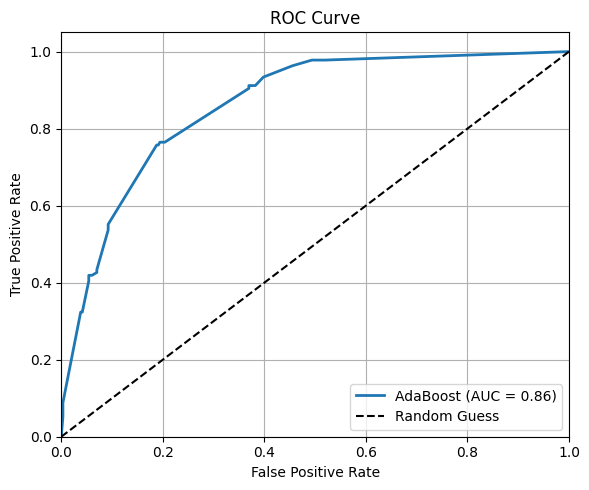

In [ ]:
def plot_roc_curve(y_true, y_proba, model_name='Model'):

    fpr = roc_curve(y_test,y_proba)[0] #false positive rate is the first array of roc_curve output
    tpr = roc_curve(y_test,y_proba)[1] #true positive rate is the second array of roc_curve output
    auc = roc_auc_score(y_true, y_proba) #roc_auc_score is calculated

    plt.figure(figsize=(6, 5)) #size of the graph

    #x axis is false positive rate
    #y axis is true positive rate
    #line width = 2
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})',lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


    #Random guess line from (0,0) to (1,1)
    plt.plot([0, 1], [0, 1], '--', color='black',label='Random Guess')

    #range of values on x and y axis
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.grid(True)
    plt.tight_layout()

     #label (in the lower right) is the model name and roc_auc_score and random guess
    plt.legend(loc='lower right')

    plt.show()


#ploting the roc curve
y_pred_proba = abc.predict_proba(X_test_transformed_drop_browser_rate)[:, 1]  #Class 1 probability
plot_roc_curve(y_test, y_pred_proba, model_name='AdaBoost') #Function call

##Adaboost from **scratch**

In [ ]:
class AdaBoost_from_scratch:

  def __init__(self,n_estimators=50,learning_rate=0.1):

    #initializing the hyperparameters
    self.n_estimators = n_estimators
    self.learning_rate = learning_rate
    self.alphas = []
    self.models = []


  def fit(self,X_train,y_train1):
    y_train = y_train1

    #changing from class(0,1) to class(-1,1)
    y_train = (2*y_train) - np.ones(X_train.shape[0])


    #initializing weight of each row initially
    w = np.ones(X_train.shape[0])/X_train.shape[0] #w is a series of weights


    #normalizing weights
    w = w/np.sum(w)


    #Now training each predictor
    for j in range(self.n_estimators):

      #decision stump is a predictor
      decision_stump = DecisionTreeClassifier(max_depth=1,max_leaf_nodes=2)
      decision_stump.fit(X_train,y_train,sample_weight=w)

      y_pred = decision_stump.predict(X_train)

      #error is the summation of weights of misclassified points
      error = np.sum(w*(y_train != y_pred))

      #alphas
      alpha = 0.5 * np.log((1-error)/(error + 0.00000000001))


      #updating the weights
      for y_t,y_p in zip(y_train,y_pred):
        if(y_t == y_p):
          w = w * np.exp(alpha)
        else:
          w = w * np.exp(-alpha)


      #normalise the weights
      w = w/np.sum(w)


      #storing each model and alpha of each model in corresponding lists
      self.models.append(decision_stump)
      self.alphas.append(alpha)



  def predict(self,X_test):

    #initially storing 0's in prediction array
    y_pred_scratch = np.zeros(X_test.shape[0])

    for model,alpha in zip(self.models,self.alphas):

      #adding each model multiplied with alpha and learning rate
      y_pred_scratch = y_pred_scratch + (alpha * self.learning_rate * model.predict(X_test))

    #converting -ve's to 0 and +ve's to 1
    y_pred_scratch = (np.sign(y_pred_scratch) + np.ones(X_test.shape[0]))/2

    #returning the prediction after converting it to int
    return (y_pred_scratch.astype(int))



In [ ]:
#training and evaluating our own adaboost model
abc_scratch = AdaBoost_from_scratch(n_estimators=50,learning_rate=0.5)
abc_scratch.fit(X_train_transformed_drop_browser_rate,y_train)
y_pred_scratch = abc_scratch.predict(X_test_transformed_drop_browser_rate)


In [ ]:
accuracy_score(y_test,y_pred_scratch)

0.7688888888888888

This is a **simple AdaBoost model**.
It is giving an **accuracy of 76.89%**



In [ ]:
#Dataset showing prediction of my own adaboost class, prediction of sklearn's adaboost class, and actual y_test
df_abc_scratch = pd.DataFrame(y_pred_scratch,columns=['abc_scratch_pred'])
df_abc_scratch['sklearn_abc_pred'] = y_pred_abc_grid
df_abc_scratch['y_test'] = y_test

df_abc_scratch.sample(5)

,abc_scratch_pred,sklearn_abc_pred,y_test
100,0,0,1
253,0,0,0
197,0,0,0
124,1,0,1
175,0,0,0
